# Transfer3Dfy Demo - Impulsive Lambert [WIP]

### Based on the [Lambert Problem Optimisation Notebook](https://github.com/eduardovila98/Lambert/blob/master/Lambert.ipynb)

In this notebook, the Transfer3Dfy functions are used on the well known Impulsive Lambert Problem, as a benchmark.

In [1]:
from transfer3Dfy import three2two, two2three
import numpy as np
import pykep as pk
#for plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

As an example a transfer from Mercury to the Earth is used. The difference in inclination is of about 7 degrees

In [3]:
#define planets
p1 = pk.planet.jpl_lp('mercury')
p2 = pk.planet.jpl_lp('earth')
#and central body
mu = pk.MU_SUN

Arbitrary times of departure and arrival

In [30]:
e1 = pk.epoch_from_string('2019-02-01 00:00:00.000')
e2 = pk.epoch_from_string('2019-09-01 00:00:00.000')
t = (e2.mjd2000 - e1.mjd2000) * pk.DAY2SEC

Get the positions and velocities

In [31]:
r1, v1 = p1.eph(e1)
r2, v2 = p2.eph(e2)

## Using the pykep.lambert_problem() directly

In [32]:
l = pk.lambert_problem(r1, r2, t, mu) 

## Using Transfer3Dfy

In [33]:
r1T, r2T, angles = three2two(r1, r2)

In [34]:
lT = pk.lambert_problem((r1T[0], r1T[1], 0.0),(r2T[0], r2T[1], 0.0))

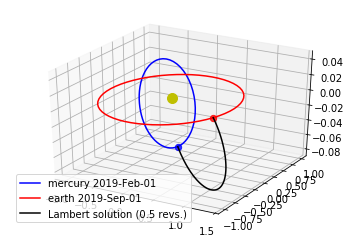

In [41]:
fig = plt.figure()
axis = fig.gca(projection='3d')
pk.orbit_plots.plot_planet(p1, t0=e1, legend=True, units=pk.AU, color='b', ax=axis)
pk.orbit_plots.plot_planet(p2, t0=e2, legend=True, units=pk.AU, color='r', ax=axis)
pk.orbit_plots.plot_lambert(l, color='k', legend=True, units=pk.AU, ax=axis)
#pk.orbit_plots.plot_lambert(lT, color='k', legend=True, units=pk.AU, ax=axis)
axis.scatter([0], [0], [0], color='y', s=100) #plots the sun